In [1]:
import pandas as pd
import numpy as np

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(data) 

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
#Drop the column 'ocean_proximity'
del df['ocean_proximity']

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

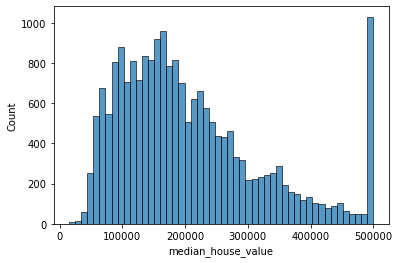

In [26]:
sns.histplot(df.median_house_value, bins=50)

Missing Values

In [60]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [17]:
df.population.median()

1166.0

Setting up the validation framework

In [28]:
#Calculate numbers for partition dataset en  train, test,validation (60,20 and 20)
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [29]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [64]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [65]:
len(df_train), len(df_val),len(df_test)

(12384, 4128, 4128)

In [32]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [33]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [37]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [72]:
X_train_fill_zero = df_train.fillna(0).values
X_train_fill_zero

array([[-1.19010e+02,  3.60600e+01,  2.50000e+01, ...,  3.59000e+02,
         1.68120e+00,  4.77000e+04],
       [-1.19460e+02,  3.51400e+01,  3.00000e+01, ...,  5.84000e+02,
         2.53130e+00,  4.58000e+04],
       [-1.22440e+02,  3.78000e+01,  5.20000e+01, ...,  9.63000e+02,
         3.48010e+00,  5.00001e+05],
       ...,
       [-1.20910e+02,  3.89800e+01,  1.30000e+01, ...,  1.19800e+03,
         3.65300e+00,  1.46800e+05],
       [-1.17720e+02,  3.40900e+01,  3.60000e+01, ...,  2.99000e+02,
         3.25660e+00,  1.51800e+05],
       [-1.22470e+02,  3.77600e+01,  3.40000e+01, ...,  4.45000e+02,
         5.18930e+00,  4.20300e+05]])

In [73]:
#Calculate mean for total_bedrooms
df_train.total_bedrooms.mean()

533.4803317730147

In [74]:
X_train_fill_mean =df_train.fillna(533.4803317730147).values


In [92]:
#Train linear regression for X train fill with zeros
w0_fill_zero, w_fill_zero = train_linear_regression(X_train_fill_zero, y_train)

y_pred_fill_zero = w0_fill_zero + X_train_fill_zero.dot(w_fill_zero)

In [93]:
w0_fill_zero, w_fill_zero

(3.867553148325841,
 array([-8.99292318e-02, -9.55704042e-02, -1.83011705e-03,  3.42997224e-06,
        -4.19608790e-06, -1.16042002e-05,  4.79202186e-05,  5.52341663e-03,
         4.28883030e-06]))

In [94]:
#Train linear regression for X train fill with mean
w0_fill_mean, w_fill_mean = train_linear_regression(X_train_fill_mean, y_train)

y_pred_fill_mean = w0_fill_mean + X_train_fill_mean.dot(w_fill_mean)

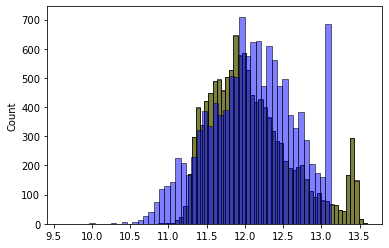

In [95]:
#Show y train v/s y pred with zero and mean fill
sns.histplot(y_pred_fill_zero, color='red', alpha=0.5, bins=50)
sns.histplot(y_pred_fill_mean, color='green', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [86]:
#Create function for calculare RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# Run model over validation set

In [99]:
def prepare_X(df,filler):
    df_num = df
    df_num = df_num.fillna(filler)
    X = df_num.values
    return X

First we'll use  zero to fill na

In [102]:
X_train = prepare_X(df_train,0)
w0, w = train_linear_regression(X_train, y_train)

X_val_zero_fill = prepare_X(df_val,0)
y_pred = w0 + X_val_zero_fill.dot(w)
rmse(y_val, y_pred)

0.1655628488333631

Now we'll use total_bedrooms  mean for to fill na

In [109]:
#Calculate total bedrooms mean for test and validation ser 
val_mean_total_bedrooms=df_val.total_bedrooms.mean()
train_mean_total_bedrooms=df_train.total_bedrooms.mean()
val_mean_total_bedrooms,train_mean_total_bedrooms

(543.6441375968992, 533.4803317730147)

In [110]:
X_train = prepare_X(df_train,533.4803317730147)
w0, w = train_linear_regression(X_train, y_train)

X_val_zero_fill = prepare_X(df_val,543.6441375968992)
y_pred = w0 + X_val_zero_fill.dot(w)
rmse(y_val, y_pred)

0.1655625256088209

RMSE is lower when we use  total_bedrooms mean to fill NA values